# 06-03. 주성분 분석

## 차원과 차원 축소
- 차원(dimension): 데이터가 가진 속성(=특성)
- 차원 축소(dimensionality reduction): 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기는 줄이고 지도 학습 모델의 성능을 향상시키는 방법

### 차원의 의미
- 다차원 배열일 때: 축의 개수
- 1차원 배열일 때: 원소의 개수

## 주성분 분석(principal component analysis)
- 대표적인 차원 축소 알고리즘으로 간단하게 PCA라고 부름
- 데이터들의 분산이 최대가 되도록하는 벡터인 주성분(principal component)을 찾아 원본 데이터를 반영함으로써 차원을 축소시키는 방법  
 그 다음으로 분산이 큰 벡터를 찾아 두 번째 주성분을 찾을 수도 있음
  - 두 개의 주성분으로도 충분히 데이터의 특성을 반영할 수 있기 때문에 일반적으로 주성분은 두 개까지 사용한다.

In [1]:
# 데이터 준비

!wget -O fruits_300.npy http://bit.ly/fruits_300_data

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2024-11-23 03:21:21--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-11-23 03:21:21--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-11-23 03:21:21--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connect

In [3]:
# PCA 클래스

from sklearn.decomposition import PCA

pca = PCA(n_components=50)  # N_componets에 주성분의 개수 지정
pca.fit(fruits_2d)  # 비지도 학습이기 때문에 타깃값 없음
print(pca.components_.shape)

(50, 10000)


- 첫 번째 차원은 지정한 주성분의 개수, 두 번째 차원은 원본 데이터의 개수와 같은 10000이 출력

In [4]:
# ipynb 파일을 import 해주는 기능
!pip install import_ipynb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.0 MB/s eta 0:00:00


In [5]:
cd /content/drive/MyDrive/GDG_HUFS/gdg_hufs/ai_basic/

/content/drive/MyDrive/GDG_HUFS/gdg_hufs/ai_basic


In [ ]:
# 두번째 차원은 원본 데이터와 차원의 개수가 같기 때문에 100 x 100 크기의 이미지로 출력할 수 있다
import import_ipynb
from 06-03_PCA.ipynb import draw_fruits

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
# transform()을 통해 원본 데이터의 차원 축소

print(fruits_2d.shape)  # 원본 데이터
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)  # 차원 축소 후 데이터

(300, 10000)
(300, 50)


## 원본 데이터 재구성
- 차원 축소를 거친 데이터는 어느정도 손실이 발생할 수 밖에 없으나 분산이 최대가 되는 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있음
- 사이킷런의 PCA 클래스는 inverse_transform() 메시드를 통해 데이터 재구성 기능을 제공

In [ ]:
# 50개로 줄였던 차원을 다시 10000개로 복원

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


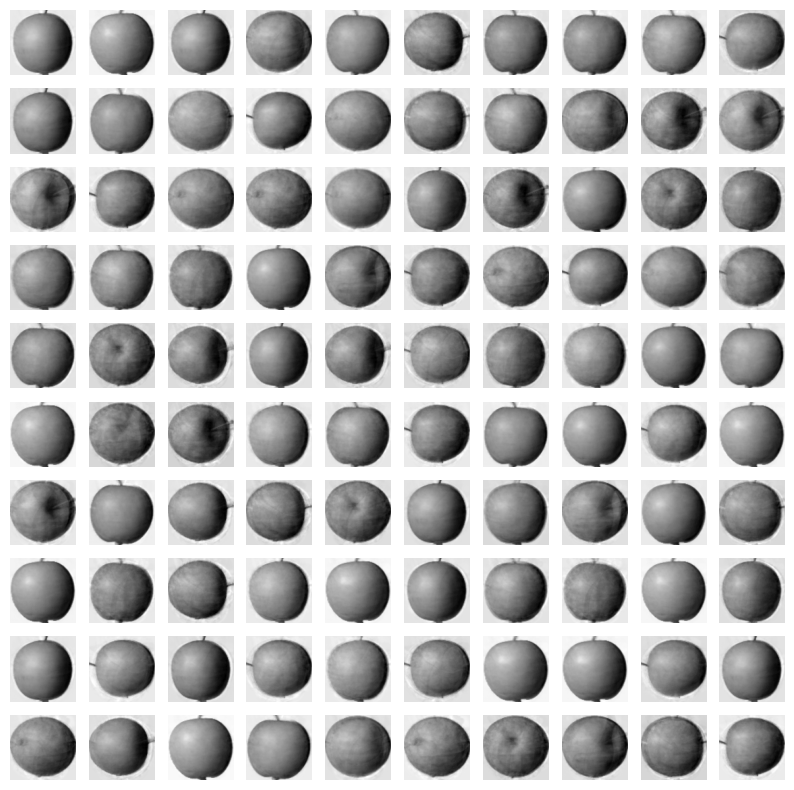

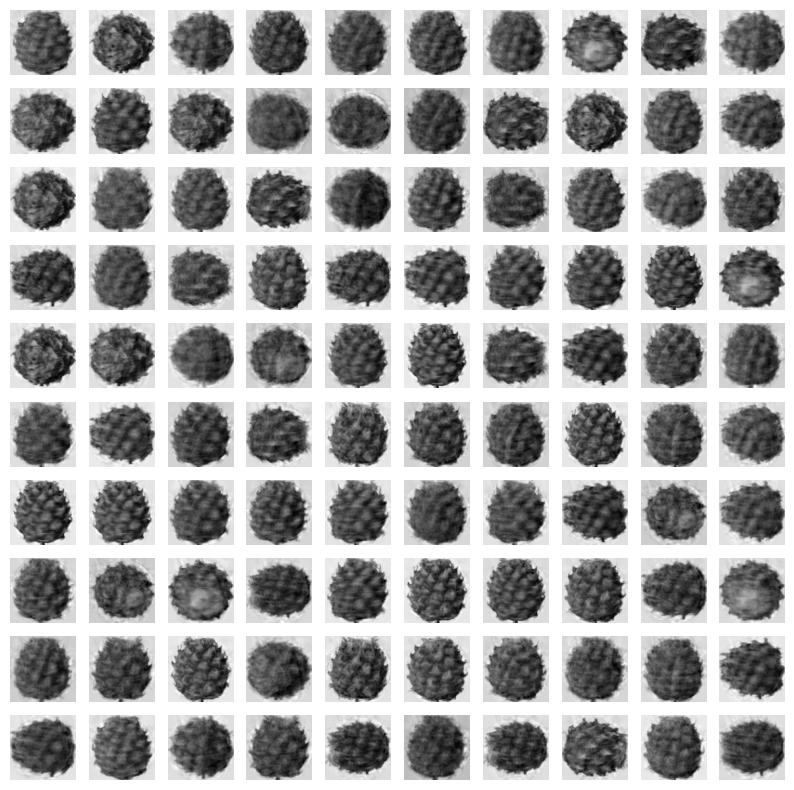

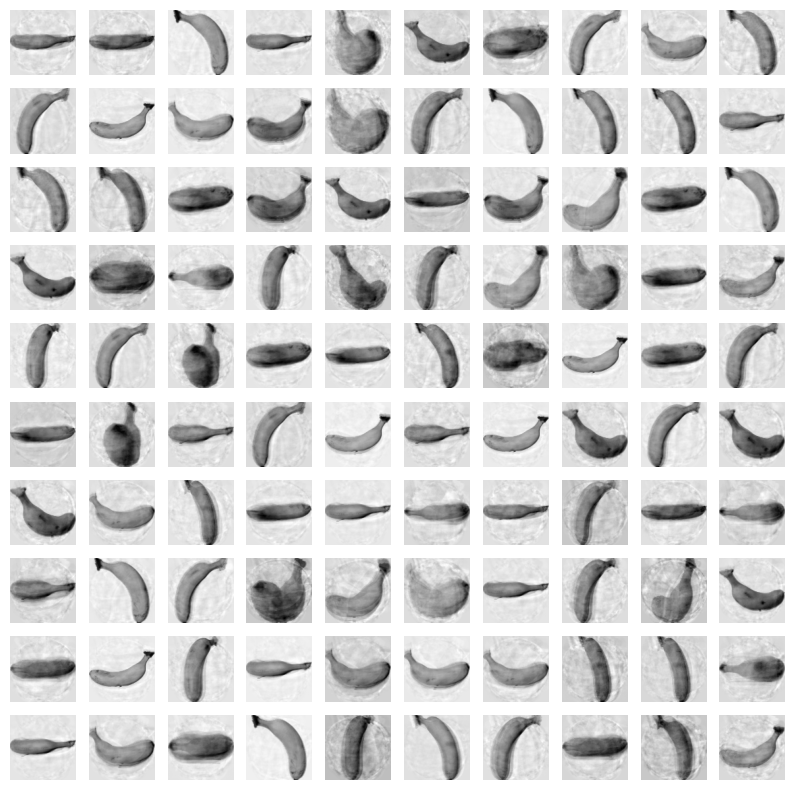

In [ ]:
# 데이터를 100 x 100 이미지로 변환해 과일별로 나누어 출력

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

- 일부 손실이 발생하였지만 50개의 특성만으로도 높은 복원율을 보여줌

## 설명된 분산(explained variance)
- 주성분이 원본 데이터를 얼마나 잘 나타내는지 기록한 값
- PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음

In [ ]:
# 주성분들의 설명된 분산 비율의 합
print(np.sum(pca.explained_variance_ratio_))

0.92155795514343


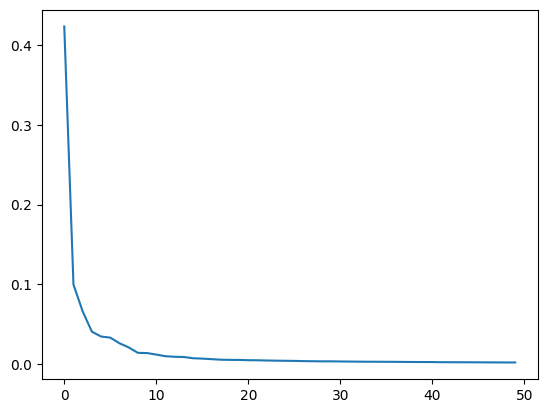

In [ ]:
# 설명된 분산의 비율을 그래프로 그려 적절한 주성분의 개수 탐색

import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)
plt.show()

- 처음 10개의 주성분이 대부분의 분산을 대표

In [ ]:
# 원본 데이터와 차원 축소 데이터의 학습 효과 비교
# 로지스틱 회귀 모델에 적용

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

In [ ]:
# 원본 데이터 fruits_2d 사용
# 성능 평가를 위해 교차 검증 수행

from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.3170326232910157


- 교차검증 점수가 매우 높고 1.3초 정도의 훈련 시간 소요

In [ ]:
# 차원 축소 데이터 사용

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.01933765411376953


- 차원이 축소되었음에도 동일한 교차검증 점수를 보이며, 훈련 시간이 매우 단축됨
- 책에서는 정확도가 1.0이었으나 점수의 변동은 없음

In [ ]:
# n_components에 주성분의 개수 대신 원하는 분산의 비율을 입력할 수 있음

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [ ]:
# 원본 데이터를 주성분이 2개인 데이터로 축소

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
# 교차 검증으로 평가

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.026942682266235352


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

- 적은 특성으로도 99%의 정확도를 보임

In [ ]:
# 차원 축소 데이터를 사용해 k-평균 알고리즘으로 클러스터 탐색

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


- 클러스터 분포가 원본 데이터와 비슷함

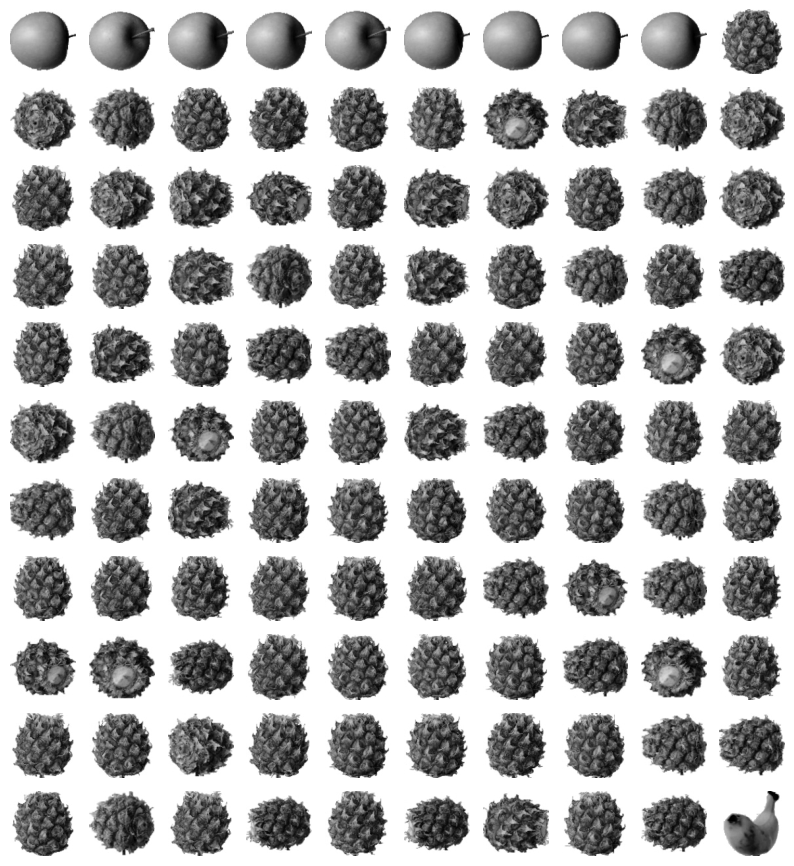

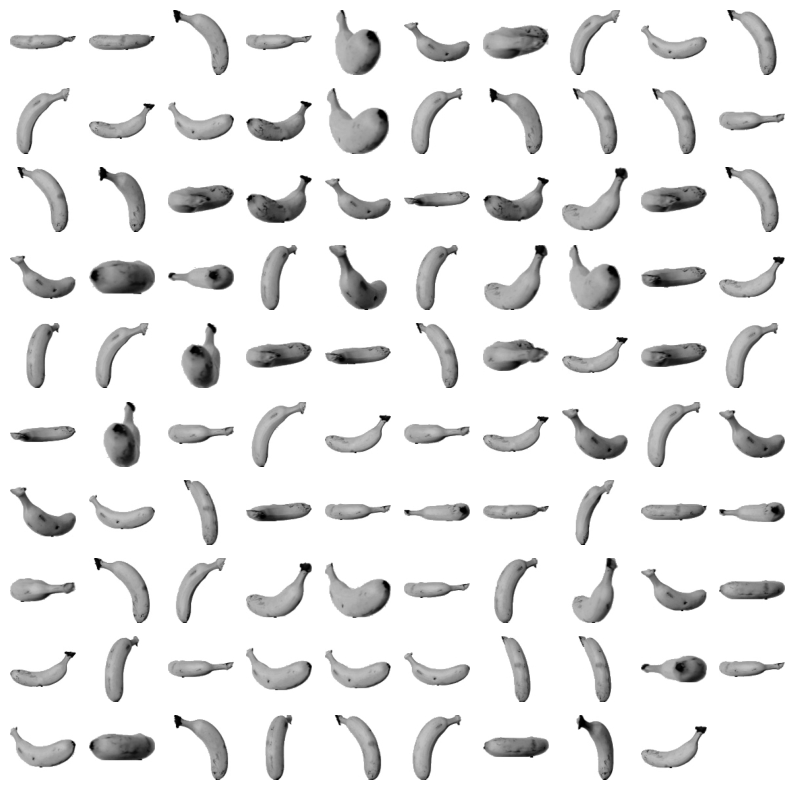

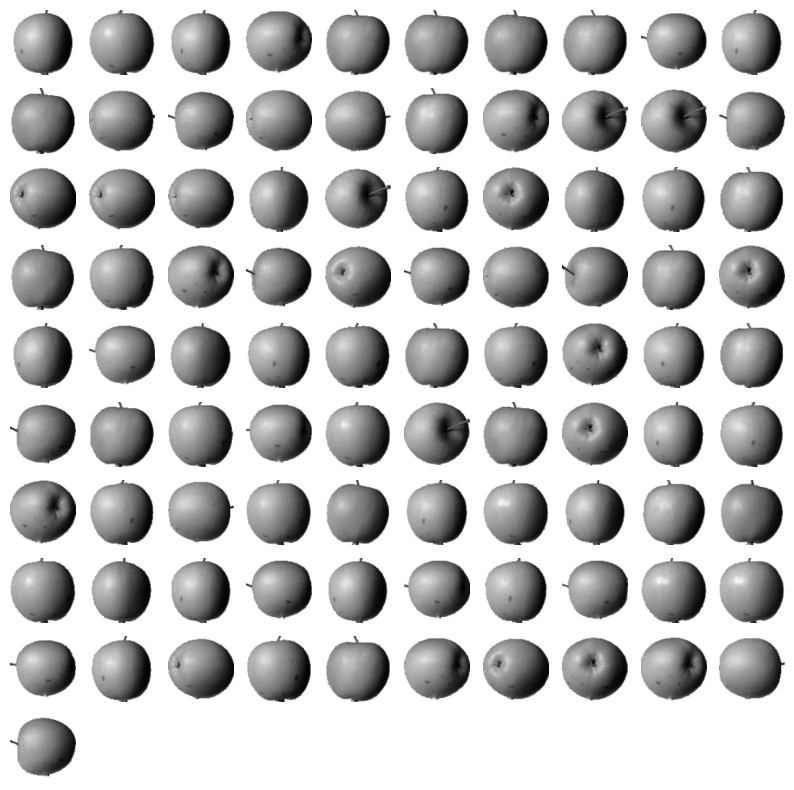

In [ ]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

- 원본 데이터를 사용했을 때와 비슷하게 파인애플과 사과를 약간 혼동(책과 달리 바나나도 하나 섞임)

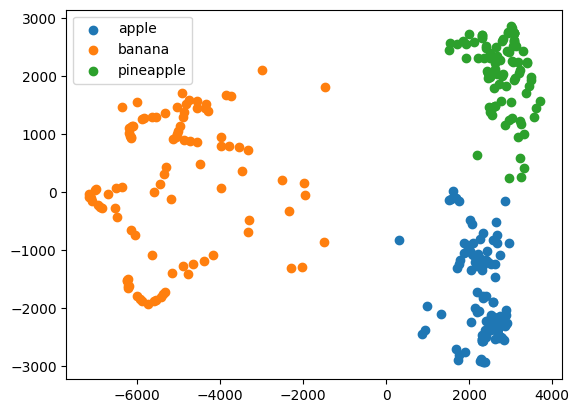

In [ ]:
# 차원을 3개 이하로 줄이면 시각화에 용이함

for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

- 클러스터의 산점도가 잘 구분됨